# Classification

As we are training with the training data (ground truth data), classification problem is **Supervised Machine Learning** problem, predicting a class. 

Classification problem will classify the test samples to each class of category. Samples have features, e.g., x-coordinate, y-coordinate, z-coordinate, etc.
To train the classifier, we prepare the ground truth data; features `X` and classes (or called label) `y`. X has a certain number of features `n_features` such that `X[:,0]`, `X[:,1]`, `X[:,2]` ... `X[:,n_features]`.

`PCA` (Principal Component Analysis) is used to reduce dimension if the running time is too long. In `PCA(n_components=None)`, `n_components` are the number of features or dimensions to keep.

In [3]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [26]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

# function to plot the decision boundaries
def plot_decision_boundary(model, X, y=None, width=400, height=400):
    cmap = cm.get_cmap('rainbow')
    # assumes >= 2 features. Plots first as x axis; second as y.
    x0 = X[:, 0]
    y0 = X[:, 1]
    xmarg = (x0.max() - x0.min()) * plt.margins()[1]
    ymarg = (y0.max() - y0.min()) * plt.margins()[1]
    xg = np.linspace(x0.min() - xmarg, x0.max() + xmarg, width)
    yg = np.linspace(y0.min() - ymarg, y0.max() + ymarg, height)
    xx, yy = np.meshgrid(xg, yg)
    X_grid = np.vstack([xx.ravel(), yy.ravel()]).T
    y_grid = model.predict(X_grid)
    plt.contourf(xx, yy, y_grid.reshape((height, width)), cmap=cmap)
    if y is not None:
        plt.scatter(x0, y0, c=y, cmap=cmap, edgecolor='k', label="ground truth")

## Naive Bayes Classifier (Gaussian)

$$ P(C_i | X) = \frac{P(X | C_i) P(C_i)}{P(X)} $$

Important points:

- Naive means that we assume samples in different feature has no dependence on each other. For example, `X[:,0]` or x-coordinate does not depend on `X[:,1]` or y-coordinate. If there is a relationship, e.g., linear relation y = 2 * x + 3, we cannot use naive bayes classifier.
- priors is a precondition of probability that a sample belongs to each class

Plotting the decision boundary allows us to see every single prediction data on the plot that has been classified to either class.

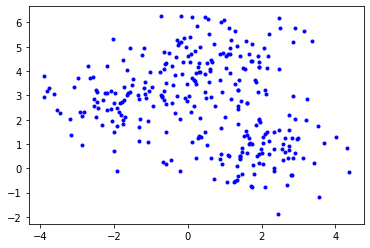

train score = 0.9288888888888889
validation score = 0.8933333333333333


Pipeline(steps=[('gaussiannb', GaussianNB())])

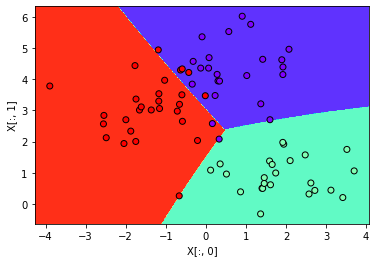

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.92      1.00      0.96        24
           2       0.96      0.79      0.86        28

    accuracy                           0.89        75
   macro avg       0.90      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75



In [27]:
from sklearn.naive_bayes import GaussianNB

# Step1: preparing data
n = 100 # sample size
X, y = make_blobs(n_samples=[100, 100, 100], n_features=2, centers=None, cluster_std=1.0, random_state=0, center_box=(-10.0, 10.0))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()


# step2: choose the model
model = make_pipeline(
    GaussianNB(priors=None)
#     GaussianNB(priors=[2/10, 5/10, 3/10]) # different pre-condition

)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
plot_decision_boundary(model, X_valid, y_valid)
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

print(classification_report(y_valid, y_pred))

## K-Nearest Neighbors (KNN) Classifier

k indicates the number of nearest neighbors needed to identify the current class label. For example, for k=5, nearest neighbors has class of 0, 1, 2, 1, 1, and 1 is the most number of class, so the current sample will be classified as 1.

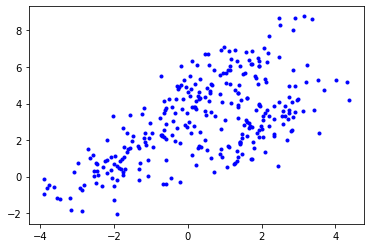

train score = 0.9466666666666667
validation score = 0.88


Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

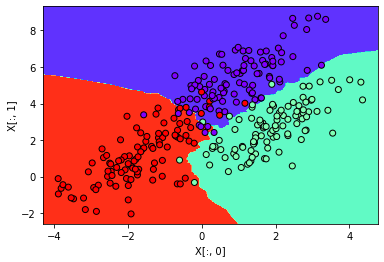

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       1.00      0.92      0.96        26
           2       0.80      0.91      0.85        22

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Step1: preparing data
n = 100 # sample size
X, y = make_blobs(n_samples=[100, 100, 100], n_features=2, centers=None, cluster_std=1.0, random_state=0, center_box=(-10.0, 10.0))
X[:, 1] = X[:,0] + X[:,1] # making a relation such that y = x + y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

# step2: choose the model
model = make_pipeline(
    KNeighborsClassifier(n_neighbors=9)
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
plot_decision_boundary(model, X, y)
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()


print(classification_report(y_valid, y_pred))

## Decision Tree Classifier

Simply a tree with probability assigned to branches. Internal detail is that this classifier uses the criterion **gini**. `criterion='gini'` is by default.

`max_depth` has a significant impact on the model score. Too high max_depth will result in overfitting where validation score << training score.

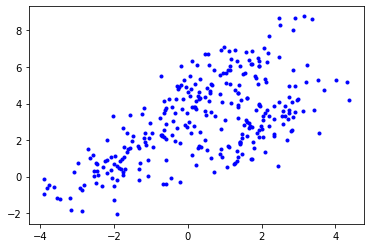

train score = 0.9911111111111112
validation score = 0.9733333333333334


Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6))])

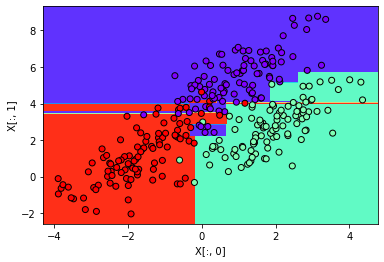

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      1.00      1.00        27
           2       1.00      0.92      0.96        24

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



In [29]:
from sklearn.tree import DecisionTreeClassifier

# Step1: preparing data
n = 100 # sample size
X, y = make_blobs(n_samples=[100, 100, 100], n_features=2, centers=None, cluster_std=1.0, random_state=0, center_box=(-10.0, 10.0))
X[:, 1] = X[:,0] + X[:,1] # making a relation such that y = x + y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

# step2: choose the model
model = make_pipeline(
    DecisionTreeClassifier(max_depth=6, criterion='gini')
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
plot_decision_boundary(model, X, y)
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

print(classification_report(y_valid, y_pred))

## Random Forest

**We will now use harder dataset, i.e., images, the high dimentional data**

`faces = fetch_lfw_people(min_faces_per_person=30, resize=1.0)` will give dictionary of data in faces. `faces` will have 683 images with 11750 features. Try executing `faces.data.shape`. 11750 features are due to the image resolution width x height as 125 x 94 pixels. Try executing `faces.images.shape`.

Random forest is the ensemble of mulitple decision trees. If `bootstrap=True` (default), intsead of training each tree with the whole training dataset, the different subsamples from the training data will be used to train each tree. If `bootstrap=False`, whole training dataset will be used to train each tree.

The result from all the trees will be averaged to output the final results.

`n_estimators` is the number of trees.



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Step1: preparing data
faces = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
X = faces.data # 683 images of data (683, 11750)
y = faces.target # classes (or labels)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)

# see if you reduce the dimension
pca = PCA(15)
pca.fit(X)
# print(pca.components_)
print(pca.explained_variance_ratio_) # --> first two components are the significant

# step2: choose the model
model = make_pipeline(
    PCA(15),
    RandomForestClassifier(n_estimators=125, max_depth=50, bootstrap=True,criterion='gini')
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

[0.16746995 0.14770259 0.0742771  0.05454808 0.05069614 0.02895014
 0.02652061 0.02403707 0.02143157 0.01932967 0.01704366 0.01601138
 0.01338948 0.01248625 0.0113524 ]
train score = 1.0
validation score = 0.7777777777777778


Pipeline(steps=[('pca', PCA(n_components=15)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=50, n_estimators=125))])

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       123
           1       0.80      0.11      0.20        36
           2       1.00      0.50      0.67        12

    accuracy                           0.78       171
   macro avg       0.86      0.54      0.58       171
weighted avg       0.79      0.78      0.71       171



## Boosting

Training a single classifer with whole training data and get weights (weighting). Then, use this weight to predict the classes with the same training data again to train a second classifier. Repeat until the max number of classifiers (or called estimators). 

Important points:

- Through the weighting, increase the weights on the wrong predictions on `y_pred` while decrease the weights on the correct predictions on `y_pred`.

The following classifers utilizes boosting with ensemble of decision tree classifiers.

`AdaBoostClassifier `

`GradientBoostingClassifier `



In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Step1: preparing data
faces = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
X = faces.data # 683 images of data (683, 11750)
y = faces.target # classes (or labels)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)

# see if you reduce the dimension
pca = PCA(15)
pca.fit(X)
# print(pca.components_)
print(pca.explained_variance_ratio_) # --> first two components are the significant

# step2: choose the model
model = make_pipeline(
    PCA(15),
    GradientBoostingClassifier(n_estimators=100, max_depth=8)
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

[0.16746984 0.14770244 0.07427713 0.05454811 0.05069615 0.02895018
 0.02652071 0.02403712 0.0214316  0.01932967 0.01704368 0.01601138
 0.0133895  0.01248627 0.01135237]
train score = 1.0
validation score = 0.8011695906432749


Pipeline(steps=[('pca', PCA(n_components=15)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=8))])

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       137
           1       0.38      0.18      0.24        28
           2       0.75      0.50      0.60         6

    accuracy                           0.80       171
   macro avg       0.66      0.54      0.58       171
weighted avg       0.76      0.80      0.77       171



## Support Vector Machine (SVM)

SVM classifier algorithm running time depends on the number of features

I manually changed the hyperparamters to have a good training and validation score. Also, f1 score for each class is good.

In [32]:
from sklearn.svm import SVC

# Step1: preparing data
faces = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
X = faces.data # 683 images of data (683, 11750)
y = faces.target # classes (or labels)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)

# see if you reduce the dimension
pca = PCA(15)
pca.fit(X)
# print(pca.components_)
print(pca.explained_variance_ratio_) # --> first two components are the significant

# step2: choose the model
model = make_pipeline(
    PCA(15),
    SVC(kernel='rbf', C=3.0) # changed manually
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

[0.16746968 0.14770253 0.07427715 0.05454808 0.0506961  0.02895022
 0.02652065 0.02403709 0.02143157 0.0193297  0.01704366 0.01601139
 0.01338947 0.01248628 0.01135234]
train score = 0.978515625
validation score = 0.8771929824561403


Pipeline(steps=[('pca', PCA(n_components=15)), ('svc', SVC(C=3.0))])

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       128
           1       0.92      0.37      0.52        30
           2       1.00      0.92      0.96        13

    accuracy                           0.88       171
   macro avg       0.93      0.76      0.80       171
weighted avg       0.88      0.88      0.86       171



## Neural Network-based Classifier

In this notebook, we will use neural the network in sklearn library, which is limited compared to keras or pytorch.

`hidden_layer_sizes=(100,50,25,100)` means that there are 4 hidden layers with 100 neurons, 50 neurons, 25 neurons, 100 neurons respectively.

`alpha` is a regularization parameter to prevent over-fitting

In [33]:
from sklearn.neural_network import MLPClassifier

# Step1: preparing data
faces = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
X = faces.data # 683 images of data (683, 11750)
y = faces.target # classes (or labels)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)

# see if you reduce the dimension
pca = PCA(15)
pca.fit(X)
# print(pca.components_)
print(pca.explained_variance_ratio_) # --> first two components are the significant

# step2: choose the model
model = make_pipeline(
    PCA(15),
    MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(100,200,), random_state=0, alpha=1.0)
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

[0.1674697  0.1477024  0.0742771  0.05454811 0.0506962  0.02895018
 0.02652066 0.02403709 0.02143156 0.0193297  0.01704369 0.01601139
 0.01338946 0.01248627 0.0113524 ]
train score = 1.0
validation score = 0.8128654970760234


Pipeline(steps=[('pca', PCA(n_components=15)),
                ('mlpclassifier',
                 MLPClassifier(alpha=1.0, hidden_layer_sizes=(100, 200),
                               random_state=0))])

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       129
           1       0.39      0.50      0.44        24
           2       1.00      0.89      0.94        18

    accuracy                           0.81       171
   macro avg       0.76      0.75      0.75       171
weighted avg       0.83      0.81      0.82       171



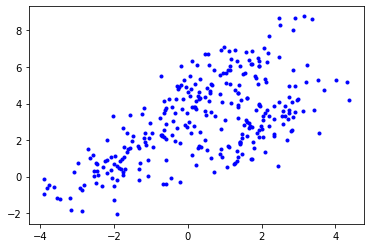

train score = 0.9288888888888889
validation score = 0.9333333333333333


Pipeline(steps=[('mlpclassifier',
                 MLPClassifier(alpha=1.0, hidden_layer_sizes=(300, 200),
                               random_state=0))])

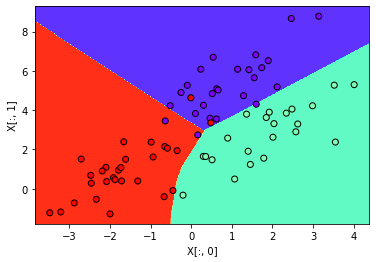

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.96      1.00      0.98        22
           2       0.93      0.93      0.93        28

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.93      0.93      0.93        75



In [34]:
# trying with simple data

from sklearn.neural_network import MLPClassifier

# Step1: preparing data
n = 100 # sample size
X, y = make_blobs(n_samples=[100, 100, 100], n_features=2, centers=None, cluster_std=1.0, random_state=0, center_box=(-10.0, 10.0))
X[:, 1] = X[:,0] + X[:,1] # making a relation such that y = x + y
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

# step2: choose the model
model = make_pipeline(
    MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(300,200,), random_state=0, alpha=1.0)
)

## step3: Train the model
model.fit(X_train, y_train) # fit to model
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f"train score = {train_score}") # evaluate the score with training data
print(f"validation score = {valid_score}") # evaluate the score with validation data
display(model)

## step4: prediction

# plot the decision boundary
y_pred = model.predict(X_valid)
plot_decision(model, X_valid, y_valid)
plt.xlabel("X[:, 0]")
plt.ylabel("X[:, 1]")
plt.show()

print(classification_report(y_valid, y_pred))